In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rescale=1./255,
    horizontal_flip=True,

)

training_set=train_datagen.flow_from_directory(
    './training_set',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [34]:
test_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
)

test_set=test_datagen.flow_from_directory(
    './test_set',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [31]:
def Makecnn():
    cnn=tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=(100, 100, 3),padding='same'))
    cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
    cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

    cnn.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3,padding='same'))
    cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

   
    cnn.add(tf.keras.layers.Flatten())
    
    cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
    cnn.add(tf.keras.layers.Dropout(0.3))
    cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return cnn

In [18]:
cnn=tf.keras.models.Sequential()

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3))

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [21]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

In [23]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=128,activation='relu',kernel_size=3))

In [25]:
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
"""from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
params_grid={
    'batch_size':[32,64],
    'optimizer':['adam','sgd'],
    'epochs':[25,30]
}
grid=GridSearchCV(estimator=KerasClassifier(Makecnn),param_grid=params_grid,scoring='accuracy',n_jobs=-1,cv=5)
x_batch,y_batch=next(training_set)
grid_res=grid.fit(x_batch,y_batch)
print(grid_res.best_params_)
print(grid_res.best_score_)"""

"from sklearn.model_selection import GridSearchCV\nfrom scikeras.wrappers import KerasClassifier\nparams_grid={\n    'batch_size':[32,64],\n    'optimizer':['adam','sgd'],\n    'epochs':[25,30]\n}\ngrid=GridSearchCV(estimator=KerasClassifier(Makecnn),param_grid=params_grid,scoring='accuracy',n_jobs=-1,cv=5)\nx_batch,y_batch=next(training_set)\ngrid_res=grid.fit(x_batch,y_batch)\nprint(grid_res.best_params_)\nprint(grid_res.best_score_)"

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

cnn1 = Makecnn()

cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('my_model.keras', save_best_only=True)


model=cnn1.fit(
    training_set,
    epochs=25,
    validation_data=test_set,
    callbacks=[early_stop, checkpoint,lr_scheduler]
)


d:\programming\pythonstuff\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 223ms/step - accuracy: 0.5871 - loss: 0.6665 - val_accuracy: 0.6510 - val_loss: 0.6169 - learning_rate: 0.0010
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.6934 - loss: 0.5801 - val_accuracy: 0.7020 - val_loss: 0.5632 - learning_rate: 0.0010
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.7270 - loss: 0.5330 - val_accuracy: 0.7330 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.7526 - loss: 0.5005 - val_accuracy: 0.7485 - val_loss: 0.5020 - learning_rate: 0.0010
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.7669 - loss: 0.4842 - val_accuracy: 0.7570 - val_loss: 0.4959 - learning_rate: 0.0010
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - accuracy: 0.7814 - loss: 0.4636 - val_accuracy: 0.7630 - val_loss: 0.4840 - learning_rate: 0.0010
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 218ms/step - accuracy: 0.7

KeyboardInterrupt: 

In [36]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


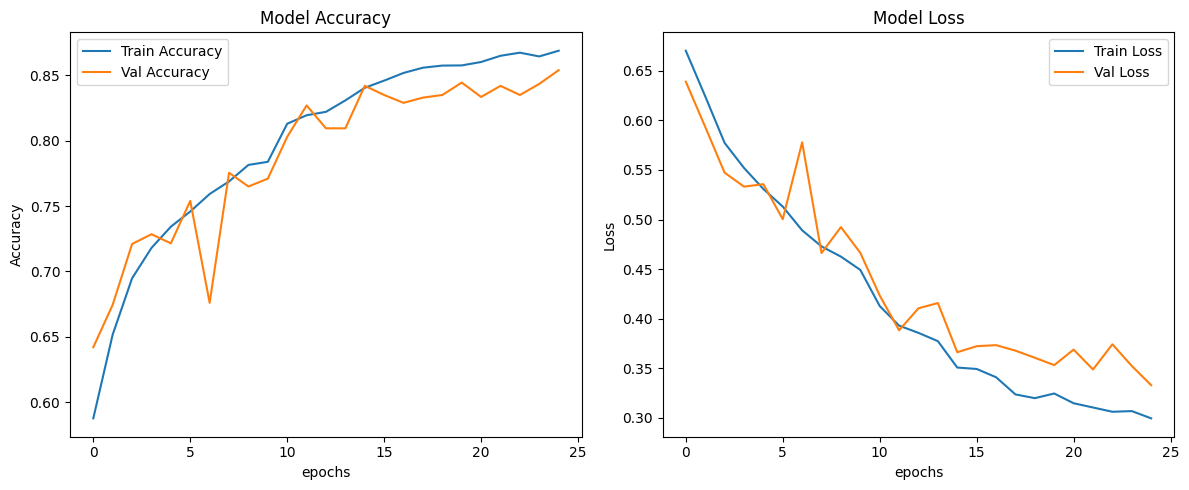

In [37]:
plot_history(model)

In [29]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
cnn.fit(x=training_set,validation_data= test_set,epochs=25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 226ms/step - accuracy: 0.5896 - loss: 0.6642 - val_accuracy: 0.6705 - val_loss: 0.6176
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.6785 - loss: 0.5916 - val_accuracy: 0.6735 - val_loss: 0.5896
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.7120 - loss: 0.5524 - val_accuracy: 0.7310 - val_loss: 0.5399
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 206ms/step - accuracy: 0.7394 - loss: 0.5145 - val_accuracy: 0.7465 - val_loss: 0.5158
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.7598 - loss: 0.4958 - val_accuracy: 0.7510 - val_loss: 0.4946
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.7811 - loss: 0.4607 - val_accuracy: 0.7730 - val_loss: 0.4869
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.7904 - loss: 0.4431 - val_accuracy: 0.7765 - val_loss: 0.4609
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.8019 - loss: 0

In [23]:
from tensorflow.keras.preprocessing import image
test_dog=image.load_img('test_dog.webp',target_size=(100,100))
test_cat=image.load_img('test_cat.webp',target_size=(100,100))
target_img=np.expand_dims(test_dog,axis=0)
res=cnn1.predict(target_img)
training_set.class_indices
if(res[0][0]>0.5):
    print("dog")
else:
    print("cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
dog
